# Laboratorio 1

In [1]:
# Importando librerias necesarias
import cv2 as cv
import numpy as np
import os

from matplotlib import pyplot as plt

## Ejercicio 7

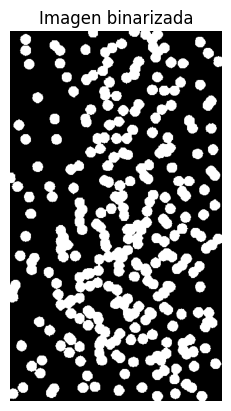

In [2]:
# Paso 1. Binarización de imagen
image_path = 'images/microscope.png'
imagen_color = cv.imread(image_path)
imagen_gris = cv.cvtColor(imagen_color, cv.COLOR_BGR2GRAY)
_, binary_image = cv.threshold(imagen_gris, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)


# Mostrando imagen binarizada
plt.imshow(binary_image, cmap='gray')
plt.title('Imagen binarizada')
plt.axis('off')
plt.show()


In [3]:
from utils import two_pass_labeling, smallest_component

labeled_image = two_pass_labeling(binary_image)
smallest_component(labeled_image)

'La componente conexa de menor tamaño es la etiqueta 2 con 158 píxeles.'

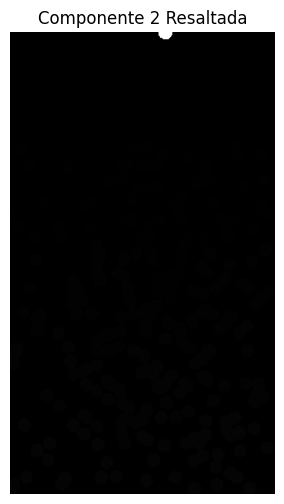

In [4]:
highlight_label = 2
highlight_image = np.copy(labeled_image)    
highlight_image[highlight_image == highlight_label] = 255**2

plt.figure(figsize=(12, 6))
plt.title(f"Componente {highlight_label} Resaltada")
plt.imshow(highlight_image, cmap='gray')
plt.axis('off')
plt.show()


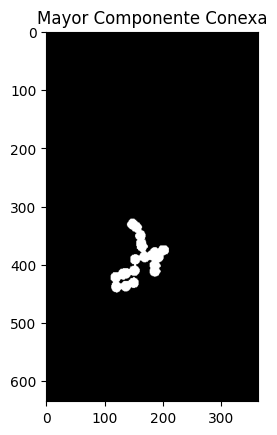

In [5]:
from utils import largest_component

plt.imshow(largest_component(labeled_image), cmap='gray')
plt.title('Mayor Componente Conexa')
plt.show()
